Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Iswaryaah Balakrishnan"

# Assignment 2 - Time Series Analysis
**(30 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. You will use the Yahoo Finance library. To install it, you will need to run this code: pip install yfinance

2. *(4 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. 

3. *(6 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(6 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(8 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(6 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `yfinance`.

---------

### Import all the relevant libraries and follow the examples below for importing data.

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web
from statsmodels.formula.api import ols
import statsmodels.api as sm

start = datetime.datetime(2017,3,17)
end = datetime.datetime(2022,3,17)

# Option 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)
fb = pdr.get_data_yahoo('FB', start = start)
ibm = pdr.get_data_yahoo('IBM', start = start)
mmm = pdr.get_data_yahoo('MMM', start = start)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Option 2) Using yfinance library only to download AMZN data

amzn = yf.download('AMZN', start=start)
fb = yf.download('FB', start=start)
ibm = yf.download('IBM', start=start)
mmm = yf.download('MMM', start=start)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB', 'IBM', 'MMM']
all_stocks = yf.download(all_stocks_list, start = start, end = end)

[*********************100%***********************]  4 of 4 completed


In [7]:
## TYPE YOUR CODE BELOW

### 1 Setup your environment to access and download latest stock data. You will use the Yahoo Finance library. 

In [8]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns

# Last 60 months
start = datetime.datetime(2017,3,17)
end = datetime.datetime(2022,3,17)

In [9]:
all_stocks_list = ['AMZN', 'FB', 'IBM', 'MMM']
all_stocks = yf.download(all_stocks_list, start = start, end = end)

[*********************100%***********************]  4 of 4 completed


In [10]:
all_stocks

Adj Close                                            Close  \
                   AMZN          FB         IBM         MMM         AMZN   
Date                                                                       
2017-03-17   852.309998  139.839996  131.688873  164.992279   852.309998   
2017-03-20   856.969971  139.940002  131.726364  165.549789   856.969971   
2017-03-21   843.200012  138.509995  130.361862  164.795029   843.200012   
2017-03-22   848.059998  139.589996  131.036591  164.872238   848.059998   
2017-03-23   847.380005  139.529999  131.066574  164.803635   847.380005   
...                 ...         ...         ...         ...          ...   
2022-03-10  2936.350098  195.210007  124.349998  143.929993  2936.350098   
2022-03-11  2910.489990  187.610001  123.959999  140.960007  2910.489990   
2022-03-14  2837.060059  186.630005  123.940002  143.479996  2837.060059   
2022-03-15  2947.330078  192.029999  125.639999  144.309998  2947.330078   
2022-03-16  3062.080078  203.630005  127.040001  145.509995  3062.080078   

                                                       High              ...  \
                    FB         IBM         MMM         AMZN          FB  ...   
Date                                                                     ...   
2017-03-17  139.839996  167.925430  192.360001   853.830017  140.339996  ...   
2017-03-20  139.940002  167.973236  193.009995   857.799988  140.190002  ...   
2017-03-21  138.509995  166.233276  192.130005   862.799988  142.309998  ...   
2017-03-22  139.589996  167.093689  192.220001   849.369995  139.789993  ...   
2017-03-23  139.529999  167.131927  192.139999   850.890015  140.389999  ...   
...                ...         ...         ...          ...         ...  ...   
2022-03-10  195.210007  124.349998  143.929993  2973.489990  196.279999  ...   
2022-03-11  187.610001  123.959999  140.960007  2993.500000  193.559998  ...   
2022-03-14  186.630005  123.940002  143.479996  2949.000000  192.289993  ...   
2022-03-15  192.029999  125.639999  144.309998  2959.699951  192.279999  ...   
2022-03-16  203.630005  127.040001  145.509995  3063.000000  203.729996  ...   

                   Low                     Open                          \
                   IBM         MMM         AMZN          FB         IBM   
Date                                                                      
2017-03-17  167.925430  190.350006   853.489990  140.339996  168.537292   
2017-03-20  167.437866  192.279999   851.510010  139.710007  167.925430   
2017-03-21  166.195023  191.509995   858.840027  141.149994  168.269592   
2017-03-22  165.200760  190.460007   840.429993  137.929993  166.386230   
2017-03-23  165.927338  191.229996   848.200012  139.479996  166.759079   
...                ...         ...          ...         ...         ...   
2022-03-10  123.129997  143.330002  2913.699951  194.839996  125.750000   
2022-03-11  123.910004  140.830002  2991.489990  192.639999  125.000000   
2022-03-14  122.690002  141.449997  2919.620117  187.029999  124.449997   
2022-03-15  123.220001  142.589996  2857.000000  190.800003  124.000000   
2022-03-16  124.709999  142.839996  2970.000000  194.699997  126.500000   

                         Volume                              
                   MMM     AMZN        FB      IBM      MMM  
Date                                                         
2017-03-17  190.820007  3384400  20592800  6193366  4228100  
2017-03-20  192.520004  2282700  12099500  2590001  2085600  
2017-03-21  193.490005  4382900  29894800  4108374  1895100  
2017-03-22  192.300003  2658700  17055400  3609223  1627300  
2017-03-23  192.119995  1953000  13022800  3912040  1482000  
...                ...      ...       ...      ...      ...  
2022-03-10  145.339996  6753100  24853000  5326800  3794000  
2022-03-11  143.470001  3440500  34656900  4117600  4148700  
2022-03-14  141.449997  3704300  31010500  3289200  3910100  
2022-03-15  144.869995  3779200  

In [11]:
all_stocks.head()

Adj Close                                           Close  \
                  AMZN          FB         IBM         MMM        AMZN   
Date                                                                     
2017-03-17  852.309998  139.839996  131.688873  164.992279  852.309998   
2017-03-20  856.969971  139.940002  131.726364  165.549789  856.969971   
2017-03-21  843.200012  138.509995  130.361862  164.795029  843.200012   
2017-03-22  848.059998  139.589996  131.036591  164.872238  848.059998   
2017-03-23  847.380005  139.529999  131.066574  164.803635  847.380005   

                                                      High              ...  \
                    FB         IBM         MMM        AMZN          FB  ...   
Date                                                                    ...   
2017-03-17  139.839996  167.925430  192.360001  853.830017  140.339996  ...   
2017-03-20  139.940002  167.973236  193.009995  857.799988  140.190002  ...   
2017-03-21  138.509995  166.233276  192.130005  862.799988  142.309998  ...   
2017-03-22  139.589996  167.093689  192.220001  849.369995  139.789993  ...   
2017-03-23  139.529999  167.131927  192.139999  850.890015  140.389999  ...   

                   Low                    Open                          \
                   IBM         MMM        AMZN          FB         IBM   
Date                                                                     
2017-03-17  167.925430  190.350006  853.489990  140.339996  168.537292   
2017-03-20  167.437866  192.279999  851.510010  139.710007  167.925430   
2017-03-21  166.195023  191.509995  858.840027  141.149994  168.269592   
2017-03-22  165.200760  190.460007  840.429993  137.929993  166.386230   
2017-03-23  165.927338  191.229996  848.200012  139.479996  166.759079   

                         Volume                              
                   MMM     AMZN        FB      IBM      MMM  
Date                                                         
2017-03-17  190.820007  3384400  20592800  6193366  4228100  
2017-03-20  192.520004  2282700  12099500  2590001  2085600  
2017-03-21  193.490005  4382900  29894800  4108374  1895100  
2017-03-22  192.300003  2658700  17055400  3609223  1627300  
2017-03-23  192.119995  1953000  13022800  3912040  1482000  

[5 rows x 24 columns]

In [12]:
all_stocks.tail()

Adj Close                                            Close  \
                   AMZN          FB         IBM         MMM         AMZN   
Date                                                                       
2022-03-10  2936.350098  195.210007  124.349998  143.929993  2936.350098   
2022-03-11  2910.489990  187.610001  123.959999  140.960007  2910.489990   
2022-03-14  2837.060059  186.630005  123.940002  143.479996  2837.060059   
2022-03-15  2947.330078  192.029999  125.639999  144.309998  2947.330078   
2022-03-16  3062.080078  203.630005  127.040001  145.509995  3062.080078   

                                                       High              ...  \
                    FB         IBM         MMM         AMZN          FB  ...   
Date                                                                     ...   
2022-03-10  195.210007  124.349998  143.929993  2973.489990  196.279999  ...   
2022-03-11  187.610001  123.959999  140.960007  2993.500000  193.559998  ...   
2022-03-14  186.630005  123.940002  143.479996  2949.000000  192.289993  ...   
2022-03-15  192.029999  125.639999  144.309998  2959.699951  192.279999  ...   
2022-03-16  203.630005  127.040001  145.509995  3063.000000  203.729996  ...   

                   Low                     Open                          \
                   IBM         MMM         AMZN          FB         IBM   
Date                                                                      
2022-03-10  123.129997  143.330002  2913.699951  194.839996  125.750000   
2022-03-11  123.910004  140.830002  2991.489990  192.639999  125.000000   
2022-03-14  122.690002  141.449997  2919.620117  187.029999  124.449997   
2022-03-15  123.220001  142.589996  2857.000000  190.800003  124.000000   
2022-03-16  124.709999  142.839996  2970.000000  194.699997  126.500000   

                         Volume                              
                   MMM     AMZN        FB      IBM      MMM  
Date                                                         
2022-03-10  145.339996  6753100  24853000  5326800  3794000  
2022-03-11  143.470001  3440500  34656900  4117600  4148700  
2022-03-14  141.449997  3704300  31010500  3289200  3910100  
2022-03-15  144.869995  3779200  31721700  4021200  3337300  
2022-03-16  144.759995  4247900  40640300  4292800  3813800  

[5 rows x 24 columns]

In [13]:
all_stocks.shape

(1259, 24)

In [14]:
all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-03-17 to 2022-03-16
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  1259 non-null   float64
 1   (Adj Close, FB)    1259 non-null   float64
 2   (Adj Close, IBM)   1259 non-null   float64
 3   (Adj Close, MMM)   1259 non-null   float64
 4   (Close, AMZN)      1259 non-null   float64
 5   (Close, FB)        1259 non-null   float64
 6   (Close, IBM)       1259 non-null   float64
 7   (Close, MMM)       1259 non-null   float64
 8   (High, AMZN)       1259 non-null   float64
 9   (High, FB)         1259 non-null   float64
 10  (High, IBM)        1259 non-null   float64
 11  (High, MMM)        1259 non-null   float64
 12  (Low, AMZN)        1259 non-null   float64
 13  (Low, FB)          1259 non-null   float64
 14  (Low, IBM)         1259 non-null   float64
 15  (Low, MMM)         1259 non-null   float64
 16  (Open,

In [15]:
all_stocks.describe(include='all')

Adj Close                                               Close  \
              AMZN           FB          IBM          MMM         AMZN   
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean   2176.441279   218.223709   116.014835   172.288243  2176.441279   
std     858.933747    65.247004     9.750713    19.284048   858.933747   
min     843.200012   124.059998    81.544205   110.075874   843.200012   
25%    1592.150024   170.980003   110.578308   157.245148  1592.150024   
50%    1871.150024   190.160004   115.381493   173.839569  1871.150024   
75%    3145.509888   266.865005   121.444489   186.498062  3145.509888   
max    3731.409912   382.179993   139.345001   225.574570  3731.409912   

                                                     High               ...  \
                FB          IBM          MMM         AMZN           FB  ...   
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000  ...   
mean    218.223709   131.880207   187.846211  2201.056082   220.842033  ...   
std      65.247004    12.751748    24.857358   870.770894    66.084506  ...   
min     124.059998    90.602295   117.870003   849.369995   129.740005  ...   
25%     170.980003   121.529636   168.830002  1608.119995   172.430000  ...   
50%     190.160004   133.298279   189.960007  1893.699951   192.740005  ...   
75%     266.865005   139.627144   204.510002  3186.119995   270.434998  ...   
max     382.179993   167.973236   258.630005  3773.080078   384.329987  ...   

               Low                      Open                            \
               IBM          MMM         AMZN           FB          IBM   
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean    130.815236   186.225591  2177.742003   218.164694   131.919588   
std      12.947600    24.928971   860.299712    65.247536    12.807493   
min      86.577438   114.040001   838.070007   123.099998    90.439774   
25%     120.216042   166.855003  1595.000000   171.055000   121.577438   
50%     132.380005   188.570007  1874.790039   190.660004   133.250000   
75%     138.766731   202.915001  3149.945068   267.820007   139.918739   
max     167.925430   255.970001  3744.000000   381.679993   168.537292   

                          Volume                                            
               MMM          AMZN            FB           IBM           MMM  
count  1259.000000  1.259000e+03  1.259000e+03  1.259000e+03  1.259000e+03  
mean    187.943924  4.300202e+06  2.119758e+07  5.175547e+06  2.659668e+06  
std      24.799576  2.062667e+06  1.394914e+07  3.197312e+06  1.409974e+06  
min     122.290001  8.813000e+05  6.046300e+06  1.247878e+06  6.562000e+05  
25%     168.385002  2.912250e+06  1.348175e+07  3.437574e+06  1.812400e+06  
50%     189.759995  3.710900e+06  1.753520e+07  4.373117e+06  2.264900e+06  
75%     204.355003  5.082200e+06  2.425140e+07  5.709655e+06  3.003350e+06  
max     258.510010  1.656500e+07  1.881199e+08  3.981442e+07  1.464620e+07  

[8 rows x 24 columns]

In [16]:
all_stocks.columns

MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close',   'FB'),
            ('Adj Close',  'IBM'),
            ('Adj Close',  'MMM'),
            (    'Close', 'AMZN'),
            (    'Close',   'FB'),
            (    'Close',  'IBM'),
            (    'Close',  'MMM'),
            (     'High', 'AMZN'),
            (     'High',   'FB'),
            (     'High',  'IBM'),
            (     'High',  'MMM'),
            (      'Low', 'AMZN'),
            (      'Low',   'FB'),
            (      'Low',  'IBM'),
            (      'Low',  'MMM'),
            (     'Open', 'AMZN'),
            (     'Open',   'FB'),
            (     'Open',  'IBM'),
            (     'Open',  'MMM'),
            (   'Volume', 'AMZN'),
            (   'Volume',   'FB'),
            (   'Volume',  'IBM'),
            (   'Volume',  'MMM')],
           )

In [17]:
all_stocks.isnull().sum()

Adj Close  AMZN    0
           FB      0
           IBM     0
           MMM     0
Close      AMZN    0
           FB      0
           IBM     0
           MMM     0
High       AMZN    0
           FB      0
           IBM     0
           MMM     0
Low        AMZN    0
           FB      0
           IBM     0
           MMM     0
Open       AMZN    0
           FB      0
           IBM     0
           MMM     0
Volume     AMZN    0
           FB      0
           IBM     0
           MMM     0
dtype: int64

### 2 (4 points) Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months. 

In [18]:
# Download only adjusted close prices per stock 
adj_all_stocks = yf.download(all_stocks_list, start = start, end = end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [19]:
# Download to csv
adj_all_stocks.to_csv(r'/Users/iswaryaah/Downloads/A2/adj_all_stocks.csv', index = True)

In [20]:
adj_all_stocks

,AMZN,FB,IBM,MMM
Date,,,,
2017-03-17,852.309998,139.839996,131.688858,164.992340
2017-03-20,856.969971,139.940002,131.726364,165.549835
2017-03-21,843.200012,138.509995,130.361847,164.795013
2017-03-22,848.059998,139.589996,131.036575,164.872253
2017-03-23,847.380005,139.529999,131.066589,164.803589
...,...,...,...,...
2022-03-10,2936.350098,195.210007,124.349998,143.929993
2022-03-11,2910.489990,187.610001,123.959999,140.960007
2022-03-14,2837.060059,186.630005,123.940002,143.479996


In [21]:
adj_all_stocks.head()

,AMZN,FB,IBM,MMM
Date,,,,
2017-03-17,852.309998,139.839996,131.688858,164.992340
2017-03-20,856.969971,139.940002,131.726364,165.549835
2017-03-21,843.200012,138.509995,130.361847,164.795013
2017-03-22,848.059998,139.589996,131.036575,164.872253
2017-03-23,847.380005,139.529999,131.066589,164.803589


In [22]:
adj_all_stocks.tail()

,AMZN,FB,IBM,MMM
Date,,,,
2022-03-10,2936.350098,195.210007,124.349998,143.929993
2022-03-11,2910.489990,187.610001,123.959999,140.960007
2022-03-14,2837.060059,186.630005,123.940002,143.479996
2022-03-15,2947.330078,192.029999,125.639999,144.309998
2022-03-16,3062.080078,203.630005,127.040001,145.509995


In [23]:
adj_all_stocks.shape

(1259, 4)

In [24]:
adj_all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-03-17 to 2022-03-16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1259 non-null   float64
 1   FB      1259 non-null   float64
 2   IBM     1259 non-null   float64
 3   MMM     1259 non-null   float64
dtypes: float64(4)
memory usage: 49.2 KB


In [25]:
adj_all_stocks.describe(include='all')

,AMZN,FB,IBM,MMM
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,2176.441279,218.223709,116.014835,172.288243
std,858.933747,65.247004,9.750713,19.284047
min,843.200012,124.059998,81.544197,110.075874
25%,1592.150024,170.980003,110.578312,157.245148
50%,1871.150024,190.160004,115.381485,173.839569
75%,3145.509888,266.865005,121.444485,186.498077
max,3731.409912,382.179993,139.344986,225.574585


In [26]:
adj_all_stocks.columns

Index(['AMZN', 'FB', 'IBM', 'MMM'], dtype='object')

In [27]:
adj_all_stocks.isnull().sum()

AMZN    0
FB      0
IBM     0
MMM     0
dtype: int64

### 3 (6 points) Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock

In [28]:
adj_all_stocks.resample('BM').last()

,AMZN,FB,IBM,MMM
Date,,,,
2017-03-31,886.539978,142.050003,130.556778,164.108856
2017-04-28,924.989990,150.250000,120.173149,167.968628
2017-05-31,994.619995,151.460007,115.600021,176.426849
2017-06-30,968.000000,150.979996,116.508911,179.636627
2017-07-31,987.780029,169.250000,109.571251,173.579407
...,...,...,...,...
2021-11-30,3507.070068,324.459991,115.706253,168.412033
2021-12-31,3334.340088,336.350006,132.069168,175.929382
2022-01-31,2991.469971,313.260010,131.980240,164.430527


<AxesSubplot:title={'center':'MonthEnd - Adjusted Close Prices'}, xlabel='Date'>

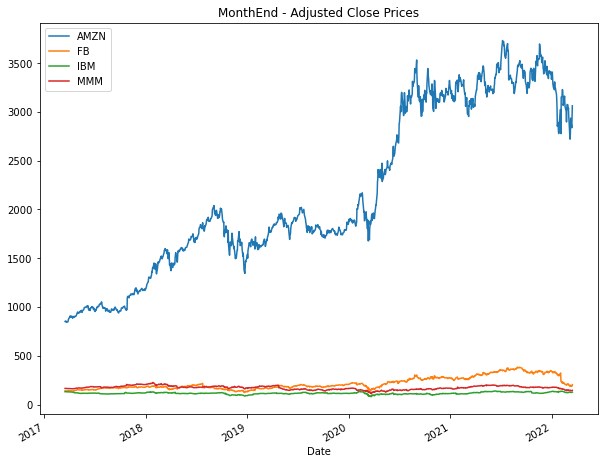

In [29]:
adj_all_stocks.plot(style='-',title='MonthEnd - Adjusted Close Prices', figsize=(10,8))

### 4 (6 points) Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks. Are they autocorrelated? Provide short explanation.

In [30]:
amzn_ac_df = yf.download('AMZN', start=start, end = end)['Adj Close']
fb_ac_df = yf.download('FB', start=start, end = end)['Adj Close']
ibm_ac_df = yf.download('IBM', start=start, end = end)['Adj Close']
mmm_ac_df = yf.download('MMM', start=start, end = end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
amzn_monthend = amzn_ac_df.resample('BM').last()
fb_monthend = fb_ac_df.resample('BM').last()
ibm_monthend = ibm_ac_df.resample('BM').last()
mmm_monthend = mmm_ac_df.resample('BM').last()

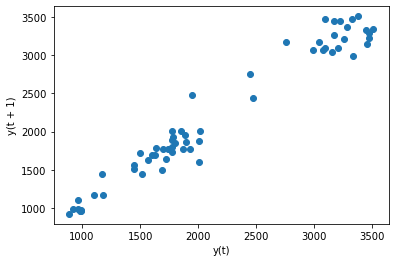

In [32]:
# Lag plot
amzn_lag = pd.plotting.lag_plot(series=amzn_monthend, lag=1)

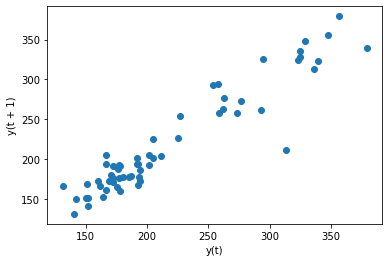

In [33]:
# Lag plot
fb_lag = pd.plotting.lag_plot(series=fb_monthend, lag=1)

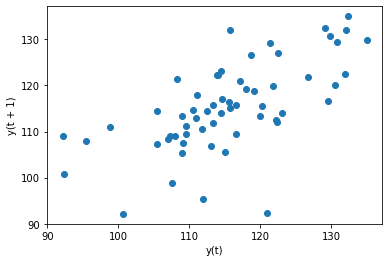

In [34]:
# Lag plot
ibm_lag = pd.plotting.lag_plot(series=ibm_monthend, lag=1)

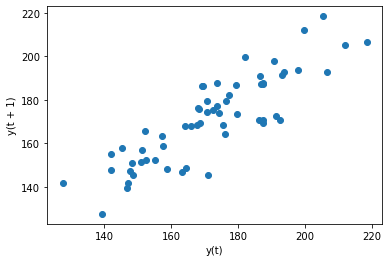

In [35]:
# Lag plot
mmm_lag = pd.plotting.lag_plot(series=mmm_monthend, lag=1)

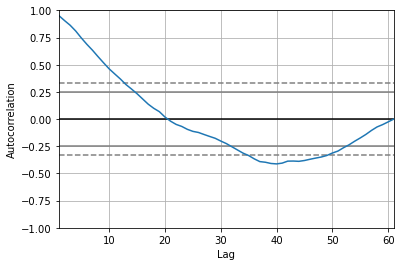

In [36]:
# Autocorrelation
amzn_autocorrelation=pd.plotting.autocorrelation_plot(amzn_monthend)

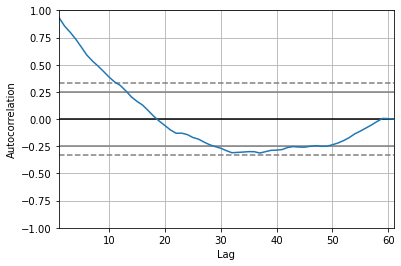

In [37]:
# Autocorrelation
fb_autocorrelation=pd.plotting.autocorrelation_plot(fb_monthend)

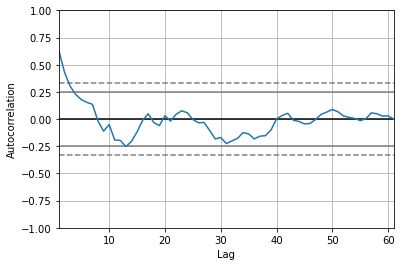

In [38]:
# Autocorrelation
ibm_autocorrelation=pd.plotting.autocorrelation_plot(ibm_monthend)

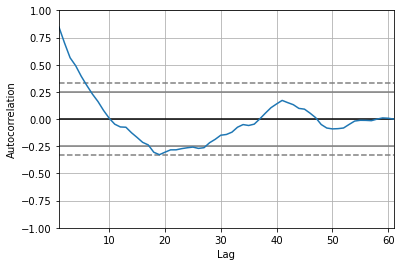

In [39]:
# Autocorrelation
mmm_autocorrelation=pd.plotting.autocorrelation_plot(mmm_monthend)

Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks. Are they autocorrelated? Provide short explanation.

- Here, we can observe some significant trend. Values aren't randomly distributed.

- IBM's autocorrelation appears to be least significant compared to Amazon, Facebook and 3M.

### 5 (8 points)Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function. Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns. Are the returns autocorrelated? Provide short explanation.

In [40]:
amzn_month_return = (amzn_monthend/amzn_monthend.shift(1)-1) * 100
amzn_month_return.head()

Date
2017-03-31         NaN
2017-04-28    4.337087
2017-05-31    7.527650
2017-06-30   -2.676399
2017-07-31    2.043391
Freq: BM, Name: Adj Close, dtype: float64

In [41]:
amzn_month_return = amzn_month_return.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

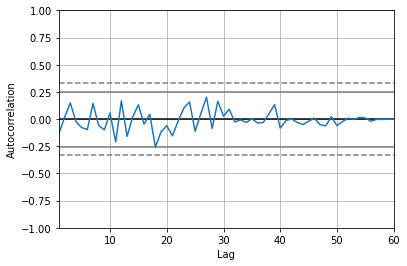

In [42]:
pd.plotting.autocorrelation_plot(amzn_month_return)

In [43]:
fb_month_return = (fb_monthend/fb_monthend.shift(1)-1) * 100
fb_month_return.head()

Date
2017-03-31          NaN
2017-04-28     5.772613
2017-05-31     0.805329
2017-06-30    -0.316923
2017-07-31    12.100944
Freq: BM, Name: Adj Close, dtype: float64

In [44]:
fb_month_return = fb_month_return.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

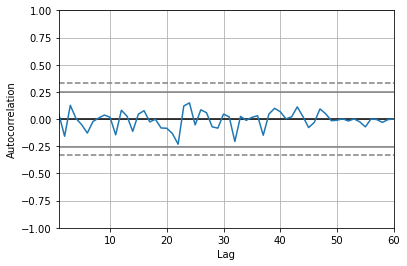

In [45]:
pd.plotting.autocorrelation_plot(fb_month_return)

In [46]:
ibm_month_return = (ibm_monthend/ibm_monthend.shift(1)-1) * 100
ibm_month_return.head()

Date
2017-03-31         NaN
2017-04-28   -7.953350
2017-05-31   -3.805412
2017-06-30    0.786210
2017-07-31   -5.954625
Freq: BM, Name: Adj Close, dtype: float64

In [47]:
ibm_month_return = ibm_month_return.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

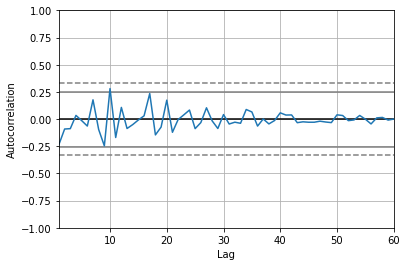

In [48]:
pd.plotting.autocorrelation_plot(ibm_month_return)

In [49]:
mmm_month_return = (mmm_monthend/amzn_monthend.shift(1)-1) * 100
mmm_month_return.head()

Date
2017-03-31          NaN
2017-04-28   -81.053464
2017-05-31   -80.926622
2017-06-30   -81.939168
2017-07-31   -82.068243
Freq: BM, Name: Adj Close, dtype: float64

In [50]:
mmm_month_return = mmm_month_return.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

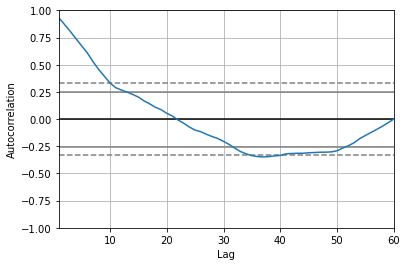

In [51]:
pd.plotting.autocorrelation_plot(mmm_month_return)

#### Amazon
The data lines are between the dotted lines which indicates that the 
correlation is highly insgnificant (-0.25 to 0.24)
It shows that there is no significant relationship between returns and time.

#### Facebook
Similar to Amazon, the correlation between returns and time passing is very insignificant. 

#### IBM
Like Amazon and Facebook, values are randomly distributed. 
Furthermore, from 35 months onwards, the correlation is very close to zero. 

#### 3M
Here, the data line is above the first quartile and so we can say that
there is a significant correlation where there is a relationship between returns and time in the first 9 months (we can see > 90% confidence interval). However from that point onwards,
there is no indication of significant values. At 22 months and 60 months there is zero correlation. 

#### Conclusion
Stock price returns are not affected by the time.

### 6 (6 points) Combine all 4 time series (returns) into a single DataFrame, Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting). Explain the results. Is there any correlation?

In [52]:
a = amzn_month_return
f = fb_month_return
i = ibm_month_return
m = mmm_month_return

In [53]:
df1 = pd.DataFrame({'a':a,'f':f,'i':i, 'm':m})

df1.head()

,a,f,i,m
Date,,,,
2017-04-28,4.337087,5.772613,-7.953350,-81.053464
2017-05-31,7.527650,0.805329,-3.805412,-80.926622
2017-06-30,-2.676399,-0.316923,0.786210,-81.939168
2017-07-31,2.043391,12.100944,-5.954625,-82.068243
2017-08-31,-0.726888,1.607091,-0.040462,-82.049499


array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='f', ylabel='a'>,
        <AxesSubplot:xlabel='i', ylabel='a'>,
        <AxesSubplot:xlabel='m', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='f'>,
        <AxesSubplot:xlabel='f', ylabel='f'>,
        <AxesSubplot:xlabel='i', ylabel='f'>,
        <AxesSubplot:xlabel='m', ylabel='f'>],
       [<AxesSubplot:xlabel='a', ylabel='i'>,
        <AxesSubplot:xlabel='f', ylabel='i'>,
        <AxesSubplot:xlabel='i', ylabel='i'>,
        <AxesSubplot:xlabel='m', ylabel='i'>],
       [<AxesSubplot:xlabel='a', ylabel='m'>,
        <AxesSubplot:xlabel='f', ylabel='m'>,
        <AxesSubplot:xlabel='i', ylabel='m'>,
        <AxesSubplot:xlabel='m', ylabel='m'>]], dtype=object)

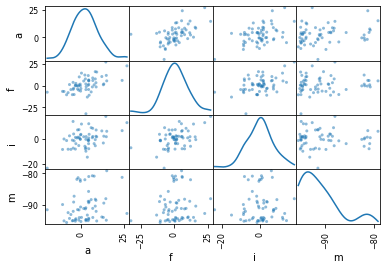

In [54]:
pd.plotting.scatter_matrix(df1, diagonal='kde')

The values are randomly distributed and no trends can be identified between returns of stock.